## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz dostarczonych w pliku gra.py,
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.


In [101]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("gra.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morfologia/gra.py --no-check-certificate

In [ ]:
def next_pix(prev: np.ndarray, x: int, y: int) -> float:
    
    N = prev[x-1:x+2, y-1:y+2]
    N_sum = np.sum(N * np.array([[1,1,1],[1,0,1],[1,1,1]]))

    if prev[x,y] == 1.0:
        if N_sum == 2.0 or N_sum == 3.0:
            return 1.0
        else:
            return 0.0
    
    else:
        if N_sum == 3.0:
            return 1.0
        else:
            return 0.0

In [ ]:
def next_frame(img: np.ndarray) -> np.ndarray:
    n,m = img.shape
    next_fr = np.zeros((n,m), dtype=float)

    for i in range(1,n-1):
        for j in range(1,m-1):
            next_fr[i,j] = next_pix(img, i,j)
    
    return next_fr

In [104]:
from gra import *
#lut = np.array([[1, 8,  64], [ 2, 16, 128], [ 4, 32, 256]])/256
#lut = np.ones((3,3))
#lut = 

In [118]:
glider = np.array([[0,1,0],[0,0,1],[1,1,1]], dtype=float)
plansza_glider = np.zeros((10,10), dtype=float)
plansza_glider[1:4,1:4] = glider

In [110]:
block = np.ones((2,2))
plansza_block = np.zeros((50,50))
plansza_block[1:3, 1:3] = block

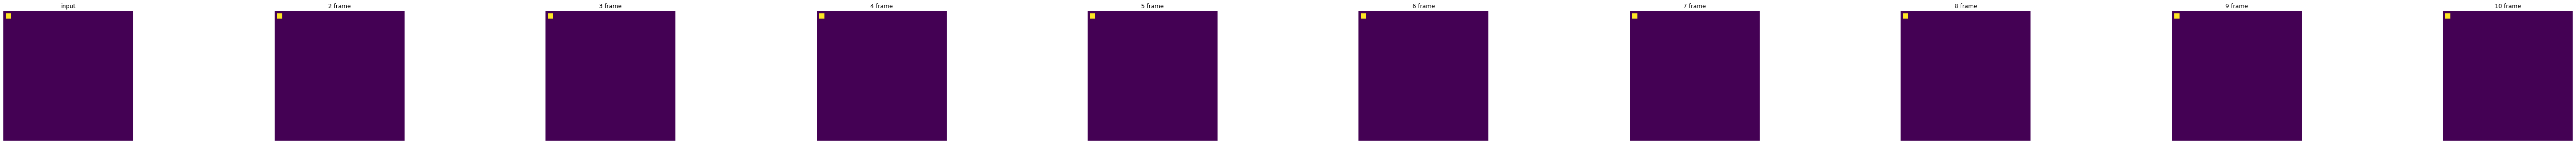

In [128]:
img = plansza_block
frames = 5
fig, ax =  plt.subplots(1, frames, figsize=(10*frames,5))
ax[0].imshow(img), ax[0].axis('off'), ax[0].set_title('input')
next = next_frame(img)
for i in range(1,frames):
    ax[i].imshow(next), ax[i].axis('off'), ax[i].set_title('{} frame'.format(i+1))
    next = next_frame(next)

In [ ]:
img = plansza_glider
frames = 5
fig, ax =  plt.subplots(1, frames, figsize=(10*frames,5))
ax[0].imshow(img), ax[0].axis('off'), ax[0].set_title('input')
next = next_frame(img)
for i in range(1,frames):
    ax[i].imshow(next), ax[i].axis('off'), ax[i].set_title('{} frame'.format(i+1))
    next = next_frame(next)

## Wnioski:
- nie zrozumiałem, jak konkretnie dokonać tego mapowania lookup table, więc zaimplementowałem o wiele prostszą wersję gry o życie,
- efektywnie stosuję tylko sumowanie i maskę jedynek 3x3 z zerem w środku, aby sprawdzić ilość sąsiadów, co daje pożądany efekt,
- sprawdza się ona dobrze i jest wydajna obliczeniowo (jak na operację bez LUT).